## Stock Market Prediction from Economic Indicators
<p>Goal</p>
<p>Predict stock market values using linear regression on several economic indicators (PPI, CPI, Oil Prices, Gold Prices, CCI).</p>

### Data Preprocessing

<ol><li>Download each data set</li>
    <li>Identify/Address variables, variable types & Data/NAN's</li>
    <li>Run Sanity Checks, Anomaly Identification</li>
    <li>Merge relevant variables into on dataframe and save to a new file</li></ol>


In [1]:
import chardet
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

### Vanguard 500 Monthly Average Price Data

Data: https://finance.yahoo.com/quote/VFIAX/history?p=VFIAX

Proxy for Market

#### 1.) Vanguard 500 Price Data - Download the dataset

<p>Below code reads the data into a dataframe and validates that load (i.e. columns and data are in the correct place)

In [2]:
#https://stackoverflow.com/questions/46037058/using-chardet-to-find-encoding-of-very-large-file/49621821
filepath = ''
with open(filepath + 'VFIAX.csv', 'rb') as raw:
    f_raw = raw.readline()
    result = chardet.detect(f_raw)
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
df_van500 = pd.read_csv(filepath +'VFIAX.csv', encoding = result['encoding'])

In [4]:
df_van500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-01,118.440002,126.889999,118.440002,126.190002,86.097778,0
1,2001-02-01,126.889999,126.889999,114.660004,114.660004,78.230995,0
2,2001-03-01,114.779999,117.000000,103.120003,107.080002,73.059273,0
3,2001-04-01,105.739998,115.760002,101.830002,115.400002,78.735870,0
4,2001-05-01,116.959999,121.370003,115.120003,116.160004,79.254417,0


In [5]:
df_van500.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
232,2020-05-01,261.619995,281.959991,260.850006,281.959991,280.545105,0
233,2020-06-01,283.029999,299.510010,277.619995,286.089996,284.654388,0
234,2020-07-01,287.529999,302.549988,287.529999,302.220001,302.220001,0
235,2020-08-01,304.399994,324.609985,304.399994,324.609985,324.609985,0
236,2020-09-01,326.380005,331.420013,308.450012,310.940002,310.940002,0


#### 2.) Vanguard 500 Price Data - Identify/Address variables, variable types, & Data/NAN's

<p>Vanguard 500 price data includes 7 variables and 237 total observations.  Each variable has 237 non-null values: there is no missing or null valued data in the dataset.</p>

<p><b>Date</b> and <b>Adj Close</b>, are relevant to project 1.  The <b>Date</b> variable has type object and is then transformed to a date type.  <b>Adj Close</b> is the value of the Vanguard 500 adjusted for dividends and splits.</p>

<p>Yahoo's <b>Adj Close</b> definition: Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions. Data is adjusted using appropriate split and dividend multipliers, adhering to Center for Research in Security Prices (CRSP) standards.</p>

In [6]:
df_van500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       237 non-null    object 
 1   Open       237 non-null    float64
 2   High       237 non-null    float64
 3   Low        237 non-null    float64
 4   Close      237 non-null    float64
 5   Adj Close  237 non-null    float64
 6   Volume     237 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.1+ KB


In [7]:
df_van500.loc[:,'Date'] = df_van500.loc[:,'Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
df_van500.drop(columns = ['Open','High','Low','Close','Volume'],inplace=True)

In [8]:
#https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
df_van500.rename(columns={'Adj Close': 'Adj_Close'},inplace=True)
df_van500

,Date,Adj_Close
0,2001-01-01,86.097778
1,2001-02-01,78.230995
2,2001-03-01,73.059273
3,2001-04-01,78.735870
4,2001-05-01,79.254417
...,...,...
232,2020-05-01,280.545105
233,2020-06-01,284.654388
234,2020-07-01,302.220001
235,2020-08-01,324.609985


In [9]:
df_van500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       237 non-null    datetime64[ns]
 1   Adj_Close  237 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 KB


In [10]:
df_van500.rename(columns=dict({'Adj_Close':'van500'}),inplace=True)

### 3.) Vanguard 500 Price Data - Sanity Checks

<p>A basic statistical review of the data reflects my expectations.  The max and min are reasonable values for the stock market given the years.  A plot of the data reconciles to Yahoos plot.  There appear to be no anomolies or outliers.</p>


In [11]:
df_van500.describe()

,van500
count,237.000000
mean,130.661279
std,68.289091
min,51.822948
25%,78.735870
50%,100.805740
75%,173.877518
max,324.609985


In [12]:
df_van500.describe().loc['max'][0]/df_van500.describe().loc['min'][0]

6.263827079077014

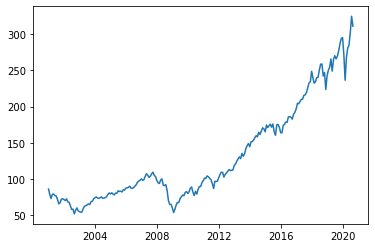

In [13]:
plt.plot(df_van500['Date'],df_van500['van500'])

### Producer Price Index (PPI) - Rail Transportation

Data: https://download.bls.gov/pub/time.series/pc/

What is the Producer Price Index (PPI)?
The Producer Price Index is a family of indexes that measures the average change over time in the selling prices received by domestic producers of goods and services. PPIs measure price change from the perspective of the seller. This contrasts with other measures, such as the Consumer Price Index (CPI), that measure price change from the purchaser's perspective.
https://www.bls.gov/ppi/ppifaq.htm#1

#### 1.) PPI_Rail Data - Download the dataset

<p>Below code reads the data into a dataframe and validates that load (i.e. columns and data are in the correct place)

In [14]:
#https://stackoverflow.com/questions/46037058/using-chardet-to-find-encoding-of-very-large-file/49621821
filepath = ''
with open(filepath + 'PPI-Rail.csv', 'rb') as raw:
    f_raw = raw.readline()
    result = chardet.detect(f_raw)
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [15]:
# Read the data into the dataframe
df_ppi_rail = pd.read_csv(filepath +'PPI-Rail.csv', delimiter='\t', encoding = result['encoding'])

### 2.) PPI_Rail Data - Identify/Address variables, variable types, & Data/NAN's

<p>Producer Price Index data includes 5 variables and 308 total observations.  Each variable has 308 non-null values: there is no missing or null valued data in the dataset.</p>

<p>Two of the column names have white space in them. They are renamed for ease of work.  <b>Year</b>, <b>Period</b>, and <b>Value</b>, are relevant to project 1.  The <b>Year</b> and <b>Period</b> variables are modified, concatenated, and changed to datetime variables.  In particular <b>Period</b> has a 13th month observation, which is dropped, and the letter M, which is removed.  Month and Period are then concatenated and converted to datetime.<\b>.  

In [16]:
#Two column headers contain whitespace.
df_ppi_rail.columns

Index(['series_id                     ', 'year', 'period', '       value',
       'footnote_codes'],
      dtype='object')

In [17]:
#https://stackoverflow.com/questions/209840/convert-two-lists-into-a-dictionary
#Rename the column headers to remove the whitespace and verify
column_mapping = dict(zip(list(df_ppi_rail.columns),['series_id','year','period','value','footnote_codes']))
df_ppi_rail.rename(columns=column_mapping,inplace=True)
df_ppi_rail.columns

Index(['series_id', 'year', 'period', 'value', 'footnote_codes'], dtype='object')

In [18]:
# Review the data, notice 308 rows and 308 non null entries
df_ppi_rail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   series_id       308 non-null    object 
 1   year            308 non-null    int64  
 2   period          308 non-null    object 
 3   value           308 non-null    float64
 4   footnote_codes  4 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.5+ KB


In [19]:
# Notice that there is a 13th month in the data.  I look at Bureau of Labor Statistics website and I googled and could not identiy
#  the reason for 13 months.  Considering this is not a focus of the assignment, I will drop the 13th month observations and move on.
df_ppi_rail.period.value_counts()

M06    24
M07    24
M05    24
M08    24
M01    24
M12    24
M04    24
M02    24
M03    24
M13    23
M09    23
M10    23
M11    23
Name: period, dtype: int64

In [20]:
#Filter on rows with period = 'M13' return indices and drop
df_ppi_rail.drop(df_ppi_rail[(df_ppi_rail['period'] == 'M13')].index,inplace=True)
#Reset the indices so the ith multiple of 13 is not missing
df_ppi_rail = df_ppi_rail.reindex()
df_ppi_rail.head(13)

,series_id,year,period,value,footnote_codes
0,PCU482---482---,1996,M12,100.0,NaN
1,PCU482---482---,1997,M01,99.9,NaN
2,PCU482---482---,1997,M02,100.0,NaN
3,PCU482---482---,1997,M03,100.1,NaN
4,PCU482---482---,1997,M04,100.1,NaN
5,PCU482---482---,1997,M05,100.2,NaN
6,PCU482---482---,1997,M06,100.6,NaN
7,PCU482---482---,1997,M07,100.7,NaN
8,PCU482---482---,1997,M08,100.7,NaN
9,PCU482---482---,1997,M09,100.8,NaN


In [21]:
# convert year to str and drop m from month and concentate in new column date
df_ppi_rail['Date'] = df_ppi_rail.loc[:,'year'].astype(str) + df_ppi_rail.loc[:,'period'].str[1:3] + '01'

In [22]:
#Create a Date column containing datetime values 
df_ppi_rail['Date'] = df_ppi_rail.loc[:,'Date'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))

In [23]:
df_ppi_rail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 307
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   series_id       285 non-null    object        
 1   year            285 non-null    int64         
 2   period          285 non-null    object        
 3   value           285 non-null    float64       
 4   footnote_codes  4 non-null      object        
 5   Date            285 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 12.2+ KB


In [24]:
#Drop the unneeded columns
df_ppi_rail.drop(columns=['series_id','year','period','footnote_codes'],inplace=True)

In [25]:
df_ppi_rail.rename(columns=dict({'value':'ppi'}),inplace=True)

### 3.) PPI_Rail Data - Sanity Checks

<p>A basic statistical review of the data reflects my expectations.  The max and min are reasonable values for the ppi given the years.  A plot of the data seems reasonable.  There appear to be no anomolies or outliers.</p>

In [26]:
df_ppi_rail.head(1)

,ppi,Date
0,100.0,1996-12-01


In [27]:
df_ppi_rail.describe()

,ppi
count,285.000000
mean,146.831579
std,35.101827
min,99.900000
25%,107.100000
50%,150.300000
75%,180.000000
max,200.100000


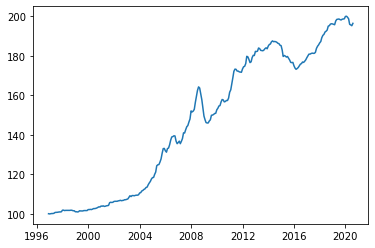

In [28]:
plt.plot(df_ppi_rail['Date'],df_ppi_rail['ppi'])

### Consumer Price Index (CPI)

The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. Indexes are available for the U.S. and various geographic areas. Average price data for select utility, automotive fuel, and food items are also available. https://www.bls.gov/cpi/

https://download.bls.gov/pub/time.series/cu/cu.data.0.Current

#### 1.) CPI Data - Download the dataset

<p>Below code reads the data into a dataframe and validates that load (i.e. columns and data are in the correct place)

In [29]:
#https://stackoverflow.com/questions/46037058/using-chardet-to-find-encoding-of-very-large-file/49621821
filepath = ''
with open(filepath + 'CPI.csv', 'rb') as raw:
    f_raw = raw.readline()
    result = chardet.detect(f_raw)
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [30]:
df_cpi = pd.read_csv(filepath +'CPI.csv', delimiter='\t', encoding = result['encoding'])

In [31]:
df_cpi.head()

,series_id,year,period,value,footnote_codes
0,CUSR0000SA0,1997,M01,159.4,NaN
1,CUSR0000SA0,1997,M02,159.7,NaN
2,CUSR0000SA0,1997,M03,159.8,NaN
3,CUSR0000SA0,1997,M04,159.9,NaN
4,CUSR0000SA0,1997,M05,159.9,NaN


#### 2.) CPI Data - Identify/Address variables, variable types, & Data/NAN's

<p>Producer Price Index data includes 5 variables and 284 total observations.  Each variable, except footnote, has 284 non-null values: there is no missing or null valued data in the dataset.</p>

<p>Two of the column names have white space in them. They are renamed for ease of work.  <b>Year</b>, <b>Period</b>, and <b>Value</b>, are relevant to project 1.  The <b>Year</b> and <b>Period</b> variables are modified, concatenated, and changed to datetime variables.  In particular, the letter M appears at the beginning of each entry in <b>Period</b>, and is removed.  Month and Period are then concatenated and converted to datetime.<\b>.  

In [32]:
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   series_id          284 non-null    object 
 1   year               284 non-null    int64  
 2   period             284 non-null    object 
 3          value       284 non-null    float64
 4   footnote_codes     0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.9+ KB


In [33]:
df_cpi.columns

Index(['series_id        ', 'year', 'period', '       value',
       'footnote_codes'],
      dtype='object')

In [34]:
column_mapping = dict(zip(list(df_cpi.columns),['series_id','year','period','value','footnote_codes']))
df_cpi.rename(columns=column_mapping,inplace=True)
df_cpi.columns

Index(['series_id', 'year', 'period', 'value', 'footnote_codes'], dtype='object')

In [35]:
# Note there is no 13th month
df_cpi.period.value_counts()

M06    24
M07    24
M05    24
M08    24
M01    24
M04    24
M02    24
M03    24
M12    23
M09    23
M10    23
M11    23
Name: period, dtype: int64

In [36]:
# convert year to str and drop m from month and concentate in new column date
df_cpi['Date'] = df_cpi.loc[:,'year'].astype(str) + df_cpi.loc[:,'period'].str[1:3] + '01'

In [37]:
#Create a Date column containing datetime values 
df_cpi['Date'] = df_cpi.loc[:,'Date'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))

In [38]:
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   series_id       284 non-null    object        
 1   year            284 non-null    int64         
 2   period          284 non-null    object        
 3   value           284 non-null    float64       
 4   footnote_codes  0 non-null      float64       
 5   Date            284 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 11.2+ KB


In [39]:
#Drop the unneeded columns
df_cpi.drop(columns=['series_id','year','period','footnote_codes'],inplace=True)

In [40]:
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   value   284 non-null    float64       
 1   Date    284 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.5 KB


In [41]:
df_cpi.rename(columns=dict({'value':'cpi'}),inplace=True)

### 3.) CPI Data - Sanity Checks

<p>A basic statistical review of the data reflects my expectations.  The max and min are reasonable values for the ppi given the years.  A plot of the data seems reasonable.  There appear to be no anomolies or outliers.</p>

In [42]:
df_cpi.head(1)

,cpi,Date
0,159.4,1997-01-01


In [43]:
df_cpi.describe()

,cpi
count,284.000000
mean,209.964313
std,30.237697
min,159.400000
25%,181.725000
50%,213.695000
75%,236.580500
max,259.681000


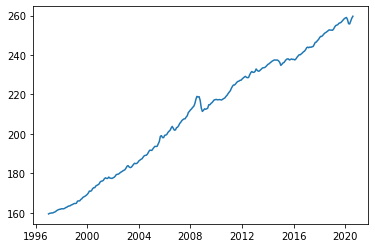

In [44]:
plt.plot(df_cpi['Date'],df_cpi['cpi'])

### Commodity Price Data (Oil, Gold)
https://www.imf.org/en/Research/commodity-prices

#### 1.) Commodity Price Data - Download the dataset

<p>Below code reads the data into a dataframe and validates that load (i.e. columns and data are in the correct place)

In [45]:
df_commod = pd.read_excel('IMFCommodityPriceIndex.xlsx')

In [46]:
df_commod.head()

,Commodity,PALLFNF,PEXGALL,PNFUEL,PFANDB,PFOOD,PBEVE,PINDU,PAGRI,PRAWM,PALLMETA,PMETA,PPMETA,PEXGMETA,PFERT,PNRG,POILAPSP,PNGAS,PCOAL,PALUM,PBANSOP,PBARL,PBEEF,PCOALAU,PCOALSA_USD,PCOCO,PCOFFOTM,PCOFFROB,PROIL,PCOPP,PCOTTIND,PFSHMEAL,PGNUTS,PHIDE,PIORECR,PLAMB,PLEAD,PLOGORE,PLOGSK,PMAIZMT,PNGASEU,PNGASJP,PNGASUS,PNICK,POILAPSP.1,POILBRE,POILDUB,POILWTI,POLVOIL,PORANG,PPOIL,PPORK,PPOULT,PRICENPQ,PRUBB,PSALM,PSAWMAL,PSAWORE,PSHRI,PSMEA,PSOIL,PSOYB,PSUGAISA,PSUGAUSA,PSUNO,PTEA,PTIN,PURAN,PWHEAMT,POATS,PSORG,PWOOLC,PWOOLF,PZINC,PLMMODY,PCOBA,PGOLD,PSILVER,PPALLA,PPLAT,PPROPANE,PUREA,PPOTASH,PDAP,PTOMATO,PMILK,PCHANA,PAPPLE
0,Commodity.Description,"All Commodity Price Index, 2016 = 100, include...","Commodities for Index: All, excluding Gold, 20...","Non-Fuel Price Index, 2016 = 100, includes Pre...","Food and Beverage Price Index, 2016 = 100, inc...","Food Price Index, 2016 = 100, includes Cereal,...","Beverage Price Index, 2016 = 100, includes Cof...","Industrial Inputs Price Index, 2016 = 100, inc...","Agriculture Price Index, 2016 = 100, includes ...","Agricultural Raw Materials Index, 2016 = 100, ...","All Metals Index, 2016 = 100: includes Metal P...","Base Metals Price Index, 2016 = 100, includes ...","Precious Metals Price Index, 2016 = 100, inclu...","All Metals EX GOLD Index, 2016 = 100: includes...","Fertilizer Index, 2016 = 100, includes DAP, Po...","Fuel (Energy) Index, 2016 = 100, includes Crud...","Crude Oil (petroleum), Price index, 2016 = 100...","Natural Gas Price Index, 2016 = 100, includes ...","Coal Price Index, 2016 = 100, includes Austral...","Aluminum, 99.5% minimum purity, LME spot price...","Bananas, Central American and Ecuador, FOB U.S...","Barley, Canadian no.1 Western Barley, spot pri...","Beef, Australian and New Zealand 85% lean fore...","Coal, Australian thermal coal, 12,000- btu/pou...","Coal, South African export price, US$ per metr...","Cocoa beans, International Cocoa Organization ...","Coffee, Other Mild Arabicas, International Cof...","Coffee, Robusta, International Coffee Organiza...","Rapeseed oil, crude, fob Rotterdam, US$ per me...","Copper, grade A cathode, LME spot price, CIF E...","Cotton, Cotton Outlook 'A Index', Middling 1-3...","Fishmeal, Peru Fish meal/pellets 65% protein, ...","Groundnuts (peanuts), 40/50 (40 to 50 count pe...","Hides, Heavy native steers, over 53 pounds, wh...",China import Iron Ore Fines 62% FE spot (CFR T...,"Lamb, frozen carcass Smithfield London, US cen...","Lead, 99.97% pure, LME spot price, CIF Europea...","Soft Logs, Average Export price from the U.S. ...","Hard Logs, Best quality Malaysian meranti, imp...","Maize (corn), U.S. No.2 Yellow, FOB Gulf of Me...","Natural Gas, Netherlands TTF Natural Gas Forwa...","Natural Gas, Indonesian Liquefied Natural Gas ...","Natural Gas, Natural Gas spot price at the Hen...","Nickel, melting grade, LME spot price, CIF Eur...","Crude Oil (petroleum), Price index, 2016 = 100...","Crude Oil (petroleum), Dated Brent, light ble...","Crude Oil (petroleum), Dubai Fateh Fateh 32 AP...","Crude Oil (petroleum), West Texas Intermediate...","Olive Oil, extra virgin less than 1% free fatt...","Generic 1st 'JO' Future, USD/lb","Palm oil, Malaysia Palm Oil Futures (first con...","Swine (pork), 51-52% lean Hogs, U.S. price, US...","Poultry (chicken), Whole bird spot price, Read...","Rice, 5 percent broken milled white rice, Thai...","Rubber, Singapore Commodity Exchange, No. 3 Ru...","Fish (salmon), Farm Bred Norwegian Salmon, exp...","Hard Sawnwood, Dark Red Meranti, select and be...","Soft Sawnwood, average export price of Douglas...",Thailand Whiteleg Shrimp 70 Shrimps/Kg Spot Price,"Soybean Meal, Chicago Soybean Meal Futures (fi...","Soybean Oil, Chicago Soybean Oil Futures (firs...","Soybeans, U.S. soybeans, Chicago Soybean futur...","Sugar, Free Market, Coffee Sugar and Cocoa Exc...","Sugar, U.S. import price, contract no.14 neare...","Sunflower oil, Sunflower Oil, US export price ...","Tea, Mombasa, Kenya, Auction Price, US cent

#### 2.) Commod Data - Identify/Address variables, variable types, & Data/NAN's

<p>Producer Price Index data includes 88 variables and 491 total rows.  There are a number of variables in the dataset.  Only Brent_Oil and Gold are relevant to the project.  The other variables are dropped.  The updated data contains three variables Date, Oil Prices (PBREOIL), Gold Prices (PGOLD) and has 487 observations and no null values.</p>

<p><b>Commodity</b>, <b>PBREOIL</b>, and <b>PGOLD</b>, are relevant to project 1.  The <b>Commodity</b> is modified to create a date time value.  In particular, <b>Commodity</b> contains the year, letter 'M' and the a month, which can be a single digit.  M is removed, a '0' is placed in front of the single digit months and converted to datetime.<\b>.  

In [47]:
df_commod.head()

,Commodity,PALLFNF,PEXGALL,PNFUEL,PFANDB,PFOOD,PBEVE,PINDU,PAGRI,PRAWM,PALLMETA,PMETA,PPMETA,PEXGMETA,PFERT,PNRG,POILAPSP,PNGAS,PCOAL,PALUM,PBANSOP,PBARL,PBEEF,PCOALAU,PCOALSA_USD,PCOCO,PCOFFOTM,PCOFFROB,PROIL,PCOPP,PCOTTIND,PFSHMEAL,PGNUTS,PHIDE,PIORECR,PLAMB,PLEAD,PLOGORE,PLOGSK,PMAIZMT,PNGASEU,PNGASJP,PNGASUS,PNICK,POILAPSP.1,POILBRE,POILDUB,POILWTI,POLVOIL,PORANG,PPOIL,PPORK,PPOULT,PRICENPQ,PRUBB,PSALM,PSAWMAL,PSAWORE,PSHRI,PSMEA,PSOIL,PSOYB,PSUGAISA,PSUGAUSA,PSUNO,PTEA,PTIN,PURAN,PWHEAMT,POATS,PSORG,PWOOLC,PWOOLF,PZINC,PLMMODY,PCOBA,PGOLD,PSILVER,PPALLA,PPLAT,PPROPANE,PUREA,PPOTASH,PDAP,PTOMATO,PMILK,PCHANA,PAPPLE
0,Commodity.Description,"All Commodity Price Index, 2016 = 100, include...","Commodities for Index: All, excluding Gold, 20...","Non-Fuel Price Index, 2016 = 100, includes Pre...","Food and Beverage Price Index, 2016 = 100, inc...","Food Price Index, 2016 = 100, includes Cereal,...","Beverage Price Index, 2016 = 100, includes Cof...","Industrial Inputs Price Index, 2016 = 100, inc...","Agriculture Price Index, 2016 = 100, includes ...","Agricultural Raw Materials Index, 2016 = 100, ...","All Metals Index, 2016 = 100: includes Metal P...","Base Metals Price Index, 2016 = 100, includes ...","Precious Metals Price Index, 2016 = 100, inclu...","All Metals EX GOLD Index, 2016 = 100: includes...","Fertilizer Index, 2016 = 100, includes DAP, Po...","Fuel (Energy) Index, 2016 = 100, includes Crud...","Crude Oil (petroleum), Price index, 2016 = 100...","Natural Gas Price Index, 2016 = 100, includes ...","Coal Price Index, 2016 = 100, includes Austral...","Aluminum, 99.5% minimum purity, LME spot price...","Bananas, Central American and Ecuador, FOB U.S...","Barley, Canadian no.1 Western Barley, spot pri...","Beef, Australian and New Zealand 85% lean fore...","Coal, Australian thermal coal, 12,000- btu/pou...","Coal, South African export price, US$ per metr...","Cocoa beans, International Cocoa Organization ...","Coffee, Other Mild Arabicas, International Cof...","Coffee, Robusta, International Coffee Organiza...","Rapeseed oil, crude, fob Rotterdam, US$ per me...","Copper, grade A cathode, LME spot price, CIF E...","Cotton, Cotton Outlook 'A Index', Middling 1-3...","Fishmeal, Peru Fish meal/pellets 65% protein, ...","Groundnuts (peanuts), 40/50 (40 to 50 count pe...","Hides, Heavy native steers, over 53 pounds, wh...",China import Iron Ore Fines 62% FE spot (CFR T...,"Lamb, frozen carcass Smithfield London, US cen...","Lead, 99.97% pure, LME spot price, CIF Europea...","Soft Logs, Average Export price from the U.S. ...","Hard Logs, Best quality Malaysian meranti, imp...","Maize (corn), U.S. No.2 Yellow, FOB Gulf of Me...","Natural Gas, Netherlands TTF Natural Gas Forwa...","Natural Gas, Indonesian Liquefied Natural Gas ...","Natural Gas, Natural Gas spot price at the Hen...","Nickel, melting grade, LME spot price, CIF Eur...","Crude Oil (petroleum), Price index, 2016 = 100...","Crude Oil (petroleum), Dated Brent, light ble...","Crude Oil (petroleum), Dubai Fateh Fateh 32 AP...","Crude Oil (petroleum), West Texas Intermediate...","Olive Oil, extra virgin less than 1% free fatt...","Generic 1st 'JO' Future, USD/lb","Palm oil, Malaysia Palm Oil Futures (first con...","Swine (pork), 51-52% lean Hogs, U.S. price, US...","Poultry (chicken), Whole bird spot price, Read...","Rice, 5 percent broken milled white rice, Thai...","Rubber, Singapore Commodity Exchange, No. 3 Ru...","Fish (salmon), Farm Bred Norwegian Salmon, exp...","Hard Sawnwood, Dark Red Meranti, select and be...","Soft Sawnwood, average export price of Douglas...",Thailand Whiteleg Shrimp 70 Shrimps/Kg Spot Price,"Soybean Meal, Chicago Soybean Meal Futures (fi...","Soybean Oil, Chicago Soybean Oil Futures (firs...","Soybeans, U.S. soybeans, Chicago Soybean futur...","Sugar, Free Market, Coffee Sugar and Cocoa Exc...","Sugar, U.S. import price, contract no.14 neare...","Sunflower oil, Sunflower Oil, US export price ...","Tea, Mombasa, Kenya, Auction Price, US cent

In [48]:
#Take a look at the size of the data
df_commod.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Columns: 88 entries, Commodity to PAPPLE
dtypes: object(88)
memory usage: 168.8+ KB


In [49]:
#https://stackoverflow.com/questions/4211209/remove-all-the-elements-that-occur-in-one-list-from-another
#Identify the columns to keep and the columns to drop
columns2use = ['Commodity','POILBRE','PGOLD']
all_columns = list(df_commod.columns)
df_commod.loc[0,columns2use]
columns2drop = [x for x in all_columns if x not in columns2use]
df_commod.drop(columns=columns2drop,inplace= True)
df_commod.drop([0,1,2,3], inplace=True)

In [50]:
df_commod.head()

,Commodity,POILBRE,PGOLD
4,1980M2,38.5,665.29
5,1980M3,38.25,553.581
6,1980M4,38.15,517.41
7,1980M5,38.5,513.795
8,1980M6,38,600.717


In [51]:
new_names = dict({'Commodity':'Date','POILBRE':'poilbre','PGOLD':'pgold'})
df_commod.rename(columns=new_names,inplace=True)
df_commod.head()

,Date,poilbre,pgold
4,1980M2,38.5,665.29
5,1980M3,38.25,553.581
6,1980M4,38.15,517.41
7,1980M5,38.5,513.795
8,1980M6,38,600.717


In [52]:
df_commod[['Year','Month']] = df_commod.Date.str.split('M',expand=True)

In [53]:
#https://stackoverflow.com/questions/20990863/python-pandas-add-leading-zero-to-make-all-months-2-digits/20991772
#https://cmdlinetips.com/2018/11/how-to-split-a-text-column-in-pandas/#:~:text=We%20can%20use%20Pandas'%20str,column%20with%20expand%3DTrue%20option.
#https://stackoverflow.com/questions/36044676/text-formatting-error-alignment-not-allowed-in-string-format-specifier
df_commod['Month'] = df_commod.Month.map('{:0>2}'.format)
df_commod['Date'] = df_commod.Year.astype(str) + df_commod.Month.astype(str) + '01'

In [54]:
df_commod.head()

,Date,poilbre,pgold,Year,Month
4,19800201,38.5,665.29,1980,02
5,19800301,38.25,553.581,1980,03
6,19800401,38.15,517.41,1980,04
7,19800501,38.5,513.795,1980,05
8,19800601,38,600.717,1980,06


In [55]:
#Create a Date column containing datetime values 
df_commod['Date'] = df_commod.loc[:,'Date'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))

In [56]:
df_commod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 4 to 490
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     487 non-null    datetime64[ns]
 1   poilbre  487 non-null    object        
 2   pgold    487 non-null    object        
 3   Year     487 non-null    object        
 4   Month    487 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 15.2+ KB


In [57]:
df_commod.drop(['Year','Month'], axis=1,inplace=True)

In [58]:
#https://stackoverflow.com/questions/27736267/pandas-reset-index-doesnt-seem-to-work
df_commod.reset_index(drop=True,inplace=True)

In [59]:
df_commod.head()

,Date,poilbre,pgold
0,1980-02-01,38.5,665.29
1,1980-03-01,38.25,553.581
2,1980-04-01,38.15,517.41
3,1980-05-01,38.5,513.795
4,1980-06-01,38,600.717


In [60]:
df_commod.poilbre =df_commod.poilbre.astype(float)
df_commod.pgold =df_commod.pgold.astype(float)

### 3.) Commodity Data - Sanity Checks

<p>A basic statistical review of the data reflects my expectations.  The max and min are reasonable values for the ppi given the years.  A plot of the data seems reasonable.  There appear to be no anomolies or outliers.</p>

In [61]:
df_commod.describe()

,poilbre,pgold
count,487.000000,487.000000
mean,43.388103,676.624344
std,30.360335,449.221471
min,9.560000,256.693182
25%,19.100000,354.550476
50%,30.790000,413.410004
75%,62.153340,1125.783766
max,133.899130,1968.030952


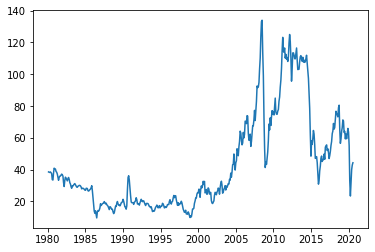

In [62]:
plt.plot(df_commod['Date'],df_commod['poilbre'])

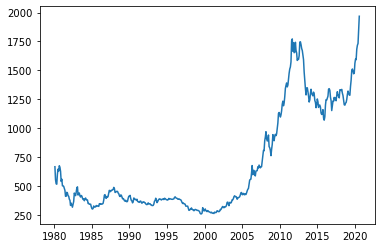

In [63]:
plt.plot(df_commod['Date'],df_commod['pgold'])

### OECD Consumer Confidence Index
This consumer confidence indicator provides an indication of future developments of households’ consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings. An indicator above 100 signals a boost in the consumers’ confidence towards the future economic situation, as a consequence of which they are less prone to save, and more inclined to spend money on major purchases in the next 12 months. Values below 100 indicate a pessimistic attitude towards future developments in the economy, possibly resulting in a tendency to save more and consume less.
https://data.oecd.org/leadind/consumer-confidence-index-cci.htm

#### 1.) Consumer Confidence Index Data - Download the dataset

<p>Below code reads the data into a dataframe and validates that load (i.e. columns and data are in the correct place)</p>

In [64]:
#https://stackoverflow.com/questions/46037058/using-chardet-to-find-encoding-of-very-large-file/49621821
filepath = ''
with open(filepath + 'DP_LIVE_18092020101952256.csv', 'rb') as raw:
    f_raw = raw.readline()
    result = chardet.detect(f_raw)
print(result)

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}


In [65]:
df_cci = pd.read_csv(filepath +'DP_LIVE_18092020101952256.csv', encoding = result['encoding'])

In [66]:
df_cci.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,NLD,CCI,AMPLITUD,LTRENDIDX,M,1998-03,101.7548,NaN
1,NLD,CCI,AMPLITUD,LTRENDIDX,M,1998-04,101.7608,NaN
2,NLD,CCI,AMPLITUD,LTRENDIDX,M,1998-05,101.7891,NaN
3,NLD,CCI,AMPLITUD,LTRENDIDX,M,1998-06,101.7598,NaN
4,NLD,CCI,AMPLITUD,LTRENDIDX,M,1998-07,101.6566,NaN


#### 2.) Consumer Confidence Index Data Data - Identify/Address variables, variable types, & Data/NAN's

<p>Consumer Confidence Index data includes 8 variables and 11055 total rows because it includes data on many countries, but only the USA location is relevant to this project and only the Value and Time variables are relevant to the project.  The other variables are dropped.  The updated data contains two variables Date, CCI and has 270 observations and no null values.</p>


In [67]:
df_cci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    11055 non-null  object 
 1   INDICATOR   11055 non-null  object 
 2   SUBJECT     11055 non-null  object 
 3   MEASURE     11055 non-null  object 
 4   FREQUENCY   11055 non-null  object 
 5   TIME        11055 non-null  object 
 6   Value       11055 non-null  float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 431.9+ KB


In [68]:
df_cci.drop(df_cci[df_cci.LOCATION != 'USA'].index,inplace=True)

In [69]:
df_cci.reset_index(drop=True,inplace=True)

In [70]:
columns_to_drop = ['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes']
df_cci.drop(columns=columns_to_drop,inplace=True)

In [71]:
df_cci.rename(columns=dict({'TIME':'Date','Value':'cci'}),inplace=True)

In [72]:
df_cci.head()

,Date,cci
0,1998-03,102.6606
1,1998-04,102.6378
2,1998-05,102.5324
3,1998-06,102.4058
4,1998-07,102.2609


In [73]:
df_cci['Date'] = df_cci.loc[:,'Date'].astype(str)  + '01'

In [74]:
df_cci['Date'] = df_cci.Date.str.replace('-','')

In [75]:
df_cci.head()

,Date,cci
0,19980301,102.6606
1,19980401,102.6378
2,19980501,102.5324
3,19980601,102.4058
4,19980701,102.2609


In [76]:
df_cci['Date'] = df_cci.loc[:,'Date'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))

In [77]:
df_cci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    270 non-null    datetime64[ns]
 1   cci     270 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 KB


### 3.) CCI Data - Sanity Checks

<p>A basic statistical review of the data reflects my expectations.  The max and min are reasonable values for the ppi given the years.  A plot of the data seems reasonable.  There appear to be no anomolies or outliers.</p>

In [78]:
df_cci.describe()

,cci
count,270.000000
mean,100.054033
std,1.582904
min,96.425420
25%,98.888908
50%,100.417700
75%,101.123250
max,102.916200


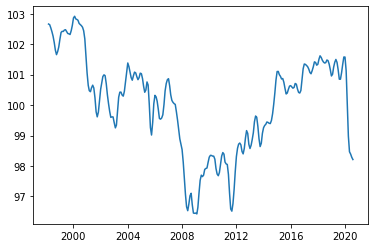

In [99]:
plt.plot(df_cci['Date'],df_cci['cci'])

In [80]:
#https://stackoverflow.com/questions/34949786/show-all-pandas-dataframes-in-an-ipython-notebook
%who_ls DataFrame

['df_cci', 'df_commod', 'df_cpi', 'df_ppi_rail', 'df_van500']

In [81]:
df_commod.info()
df_cci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     487 non-null    datetime64[ns]
 1   poilbre  487 non-null    float64       
 2   pgold    487 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 11.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    270 non-null    datetime64[ns]
 1   cci     270 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 KB


In [82]:
df_data = pd.merge(df_cci, df_commod,on='Date')

In [83]:
df_data = pd.merge(df_data,df_cpi,on='Date')

In [84]:
df_data = pd.merge(df_data,df_ppi_rail,on='Date')

In [85]:
df_data = pd.merge(df_data,df_van500,on='Date')

In [86]:
df_data.sample(5)

,Date,cci,poilbre,pgold,cpi,ppi,van500
29,2003-06-01,100.42280,27.545714,356.352381,183.100,109.2,63.087196
65,2006-06-01,99.53723,68.857727,596.145455,201.800,137.3,87.188820
105,2009-10-01,97.91753,73.194091,1043.159091,216.509,150.3,76.904442
80,2007-09-01,99.50626,77.128500,712.652500,208.547,144.1,107.202576
146,2013-03-01,98.86205,109.240000,1592.862500,232.282,182.4,124.582802


In [87]:
df_van500.loc[df_van500['Date'].isin(['2011-03-01','2019-11-01','2017-11-01','2007-01-01','2006-11-01'])]

,Date,van500
70,2006-11-01,97.338882
72,2007-01-01,100.191612
122,2011-03-01,100.805740
202,2017-11-01,232.575775
226,2019-11-01,286.731567


In [88]:
df_cpi.loc[df_cpi['Date'].isin(['2011-03-01','2019-11-01','2017-11-01','2007-01-01','2006-11-01'])]

,cpi,Date
118,202.000,2006-11-01
120,203.437,2007-01-01
170,223.046,2011-03-01
250,247.333,2017-11-01
274,257.824,2019-11-01


In [89]:
df_cci.loc[df_cci['Date'].isin(['2011-03-01','2019-11-01','2017-11-01','2007-01-01','2006-11-01'])]

,Date,cci
104,2006-11-01,100.7087
106,2007-01-01,100.8656
156,2011-03-01,98.1287
236,2017-11-01,101.3973
260,2019-11-01,101.3402


In [90]:
df_commod.loc[df_commod['Date'].isin(['2011-03-01','2019-11-01','2017-11-01','2007-01-01','2006-11-01'])]

,Date,poilbre,pgold
321,2006-11-01,58.484091,627.827273
323,2007-01-01,54.553913,631.165909
373,2011-03-01,114.441304,1424.010870
453,2017-11-01,62.575455,1282.284091
477,2019-11-01,62.744286,1470.016667


In [91]:
df_data.to_csv('p1_procesed_data.csv')

In [97]:
#https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
df_data[df_data.isna().any(axis=1)]

,Date,cci,poilbre,pgold,cpi,ppi,van500


In [98]:
df_data.head(10)

,Date,cci,poilbre,pgold,cpi,ppi,van500
0,2001-01-01,101.05480,25.64,265.486364,175.6,103.9,86.097778
1,2001-02-01,100.64850,27.41,262.089474,176.0,103.8,78.230995
2,2001-03-01,100.47320,24.40,263.027273,176.1,104.0,73.059273
3,2001-04-01,100.43800,25.55,260.330556,176.4,103.7,78.735870
4,2001-05-01,100.56860,28.45,272.093182,177.3,103.8,79.254417
5,2001-06-01,100.65260,27.72,270.202381,177.7,104.0,77.112045
6,2001-07-01,100.56120,24.54,267.526190,177.4,104.1,76.546516
7,2001-08-01,100.24070,25.67,272.092105,177.4,104.2,71.751213
8,2001-09-01,99.77901,25.54,284.472353,178.1,105.6,65.697266
9,2001-10-01,99.61253,20.48,282.267143,177.6,105.8,67.196068


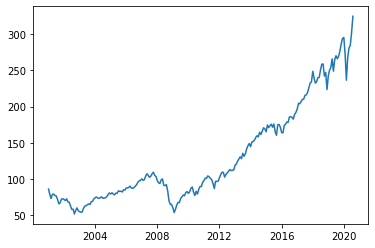

In [101]:
plt.plot(df_data['Date'],df_data['van500'])